# 0.) Import the Credit Card Fraud Data From CCLE

In [236]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [237]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [238]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B_Xialei_Gao/fraudTest.csv")

In [239]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [240]:
from sklearn.model_selection import train_test_split

In [241]:
features = df[['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud']]
features['trans_date_trans_time'] = pd.to_datetime(features['trans_date_trans_time'])
features['trans_date_trans_time'] = [i.hour for i in features['trans_date_trans_time']]

dummies = pd.get_dummies(features['category'])
X = pd.concat([dummies, features[['city_pop','amt','trans_date_trans_time']]], axis =1)
y = features['is_fraud']

<ipython-input-241-ff9bf9489630>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['trans_date_trans_time'] = pd.to_datetime(features['trans_date_trans_time'])
<ipython-input-241-ff9bf9489630>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['trans_date_trans_time'] = [i.hour for i in features['trans_date_trans_time']]


In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [243]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [244]:
!pip install scikit-learn==0.23.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [273]:
ros = RandomOverSampler(random_state = 0)
ros.fit(X_train,y_train)
over_X, over_y = ros.fit_resample(X_train,y_train)

In [274]:
rus = RandomUnderSampler(random_state = 0)
rus.fit(X_train,y_train)
under_X, under_y = rus.fit_resample(X_train,y_train)

In [247]:
from imblearn.over_sampling import SMOTE

In [275]:
oversample = SMOTE()
smote_X, smote_y = oversample.fit_resample(X_train,y_train)

In [276]:
type(smote_y)

pandas.core.series.Series

# 3.) Train three logistic regression models 

In [277]:
from sklearn.linear_model import LogisticRegression
# Oversampling 
over_log = LogisticRegression().fit(over_X, over_y)
under_log = LogisticRegression().fit(under_X, under_y)
smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [278]:
over_y = over_log.predict(X_test)
under_y = under_log.predict(X_test)
smote_y = smote_log.predict(X_test)

In [251]:
from sklearn import metrics

In [283]:
over_matrix = metrics.confusion_matrix(y_test, over_y)
over_matrix

array([[134484,  31612],
       [   143,    477]])

In [284]:
under_matrix = metrics.confusion_matrix(y_test, under_y)
under_matrix

array([[134457,  31639],
       [   143,    477]])

In [285]:
smote_matrix = metrics.confusion_matrix(y_test, smote_y)
smote_matrix

array([[136309,  29787],
       [   151,    469]])

# 5.) Which performed best in Out of Sample metrics?

In [282]:
specificity_over = over_matrix[1,1]/(over_matrix[1,0]+over_matrix[1,1])
specificity_over

0.7693548387096775

In [256]:
specificity_under = under_matrix[1,1]/(under_matrix[1,0]+under_matrix[1,1])
specificity_under

0.7693548387096775

In [257]:
specificity_smote = smote_matrix[1,1]/(smote_matrix[1,0]+smote_matrix[1,1])
specificity_smote

0.7548387096774194

In [258]:
# Accroding to the specificity score above, the Over&Under Random model yield to same score that is higher than the SMOTE.

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [259]:
import matplotlib.pyplot as plt

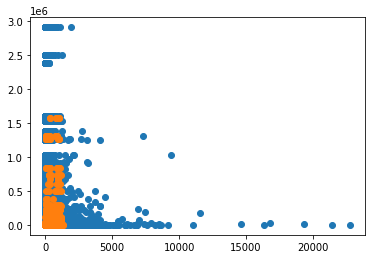

In [260]:
OG_data_temp = pd.concat([X_train, y_train], axis=1)
plt.scatter(OG_data_temp[OG_data_temp['is_fraud'] == 0]['amt'], OG_data_temp[OG_data_temp['is_fraud'] == 0]['city_pop'])
plt.scatter(OG_data_temp[OG_data_temp['is_fraud'] == 1]['amt'], OG_data_temp[OG_data_temp['is_fraud'] == 1]['city_pop'])

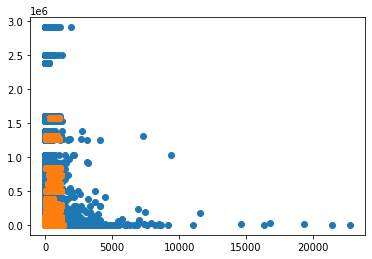

In [268]:
smote_after = pd.concat([smote_X, smote_y], axis=1)
plt.scatter(smote_after[smote_after['is_fraud'] == 0]['amt'], smote_after[smote_after['is_fraud'] == 0]['city_pop'])
plt.scatter(smote_after[smote_after['is_fraud'] == 1]['amt'], smote_after[smote_after['is_fraud'] == 1]['city_pop'])

In [267]:
type(smote_y)

pandas.core.series.Series